<a href="https://colab.research.google.com/github/JoelAlgera/Deep-Learning-Practice/blob/main/Basic_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [101]:
#Create a model class that inherist nn.module
class Model(nn.Module):
  # Input layer (4 features of the flower) --> Hidden layer1 (number of neurons) --> H2 --> Output (3 clases of iris flowers)

  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3):
    super().__init__() #instantiates our nn.module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.out(x))

    return x

In [102]:
#pick a manual seed for randomization
torch.manual_seed(69)
#let's cerate an instance of our model
model = Model()

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [105]:
#change last column from strings to nums
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [106]:
#Train test split. Set X,y
X = my_df.drop('species', axis = 1)
y = my_df['species']

In [107]:
#convert these to numpy arrays
X = X.values
y = y.values

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
#Train Test Split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)

In [111]:
#convert x features to float tensors

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [112]:
#conver y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [113]:
#Set the criterion of our model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
#choose Adam optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [114]:
#Train our model!
# of epochs (one run through all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  #go forward and get a prediction
  y_pred = model.forward(X_train) #Get predicted results

  #measure loss/error, will be high at first
  loss = criterion(y_pred, y_train) #predicted value vs training value

  #keeping track of losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i%10 == 0:
    print (f'Epoch: {i} and loss: {loss}')

  #Do some back propagation: take the error rate of forward propagation and feed it back through the network to fine-tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.065578579902649
Epoch: 10 and loss: 0.9426288604736328
Epoch: 20 and loss: 0.8430485129356384
Epoch: 30 and loss: 0.7688835859298706
Epoch: 40 and loss: 0.6621432900428772
Epoch: 50 and loss: 0.5493326187133789
Epoch: 60 and loss: 0.48754632472991943
Epoch: 70 and loss: 0.45850756764411926
Epoch: 80 and loss: 0.44501543045043945
Epoch: 90 and loss: 0.437701016664505


Text(0.5, 0, 'epochs')

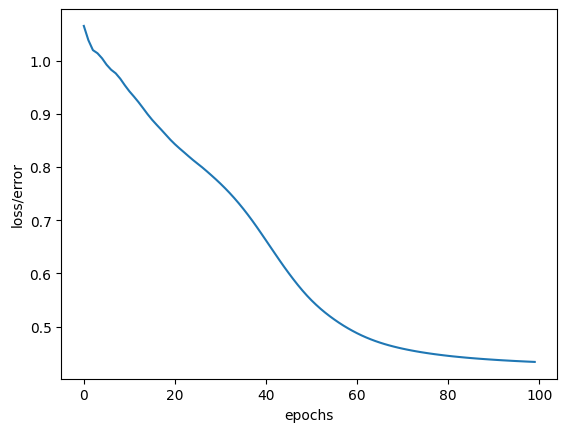

In [115]:
#Graph it out
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel("epochs")

In [116]:
#Evaluate Model on test data set (validate model on test set)
with torch.no_grad(): #Basically turn off back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be predictions

  loss = criterion(y_eval, y_test) #finding loss/error

In [117]:
loss


tensor(0.3877)

In [118]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

#will tell us what type of flower the network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
  print(f'We got {correct} correct')

1.) tensor([0., 0., 0.]) 	 0 	 0
2.) tensor([0.0000, 7.7101, 0.3338]) 	 1 	 1
3.) tensor([0., 0., 0.]) 	 0 	 0
4.) tensor([ 0.0000,  7.9551, 15.7813]) 	 2 	 2
5.) tensor([0., 0., 0.]) 	 0 	 0
6.) tensor([0., 0., 0.]) 	 0 	 0
7.) tensor([0.0000, 6.9373, 2.2802]) 	 1 	 1
8.) tensor([ 0.0000,  9.5673, 15.5078]) 	 2 	 2
9.) tensor([0.0000, 9.4515, 9.9758]) 	 2 	 2
10.) tensor([0., 0., 0.]) 	 0 	 0
11.) tensor([ 0.0000,  8.2212, 11.2739]) 	 2 	 2
12.) tensor([ 0.0000, 10.4217, 18.4207]) 	 2 	 2
13.) tensor([0., 0., 0.]) 	 0 	 0
14.) tensor([0.0000, 7.3042, 2.4282]) 	 1 	 1
15.) tensor([ 0.0000,  8.5341, 13.0179]) 	 2 	 2
16.) tensor([0.0000, 7.7166, 3.0156]) 	 1 	 1
17.) tensor([0.0000, 6.2488, 0.0000]) 	 1 	 1
18.) tensor([ 0.0000,  9.0651, 16.8540]) 	 2 	 2
19.) tensor([0.0000, 6.8985, 0.0000]) 	 1 	 1
20.) tensor([ 0.0000,  7.9370, 14.4772]) 	 2 	 2
21.) tensor([ 0.0000,  9.0065, 18.0884]) 	 2 	 2
22.) tensor([0.0000, 6.8555, 0.0000]) 	 1 	 1
23.) tensor([0., 0., 0.]) 	 0 	 0
24.) tensor